In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df_fly=pd.read_excel(r'E:\DATA SCIENCE\Assignment\Week 14\25 Mar_AssQ\flight_price.xlsx')
df_play=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df_fly.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [86]:
df_play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#  Flight Price:

# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [87]:
df_fly.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df_fly.shape

(10683, 11)

rows = 10683

columns = 11

#  Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution

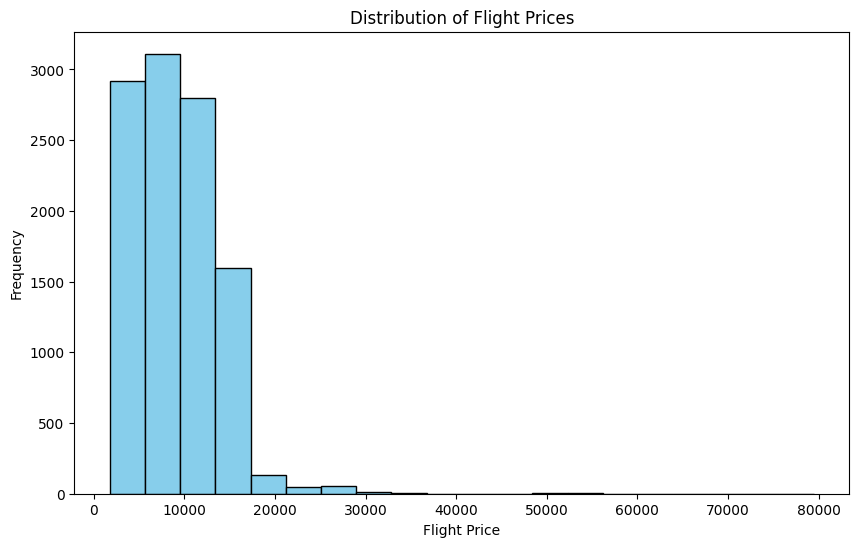

In [88]:
flight_prices = df_fly['Price']


plt.figure(figsize=(10, 6))
plt.hist(flight_prices, bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Flight Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')

plt.show()


#  Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [16]:
max_price = df_fly['Price'].max()
min_price = df_fly['Price'].min()

print("maximum price :", max_price , '\nminimum price :', min_price, '\nprice range is:', max_price - min_price)

maximum price : 79512 
minimum price : 1759 
price range is: 77753


# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

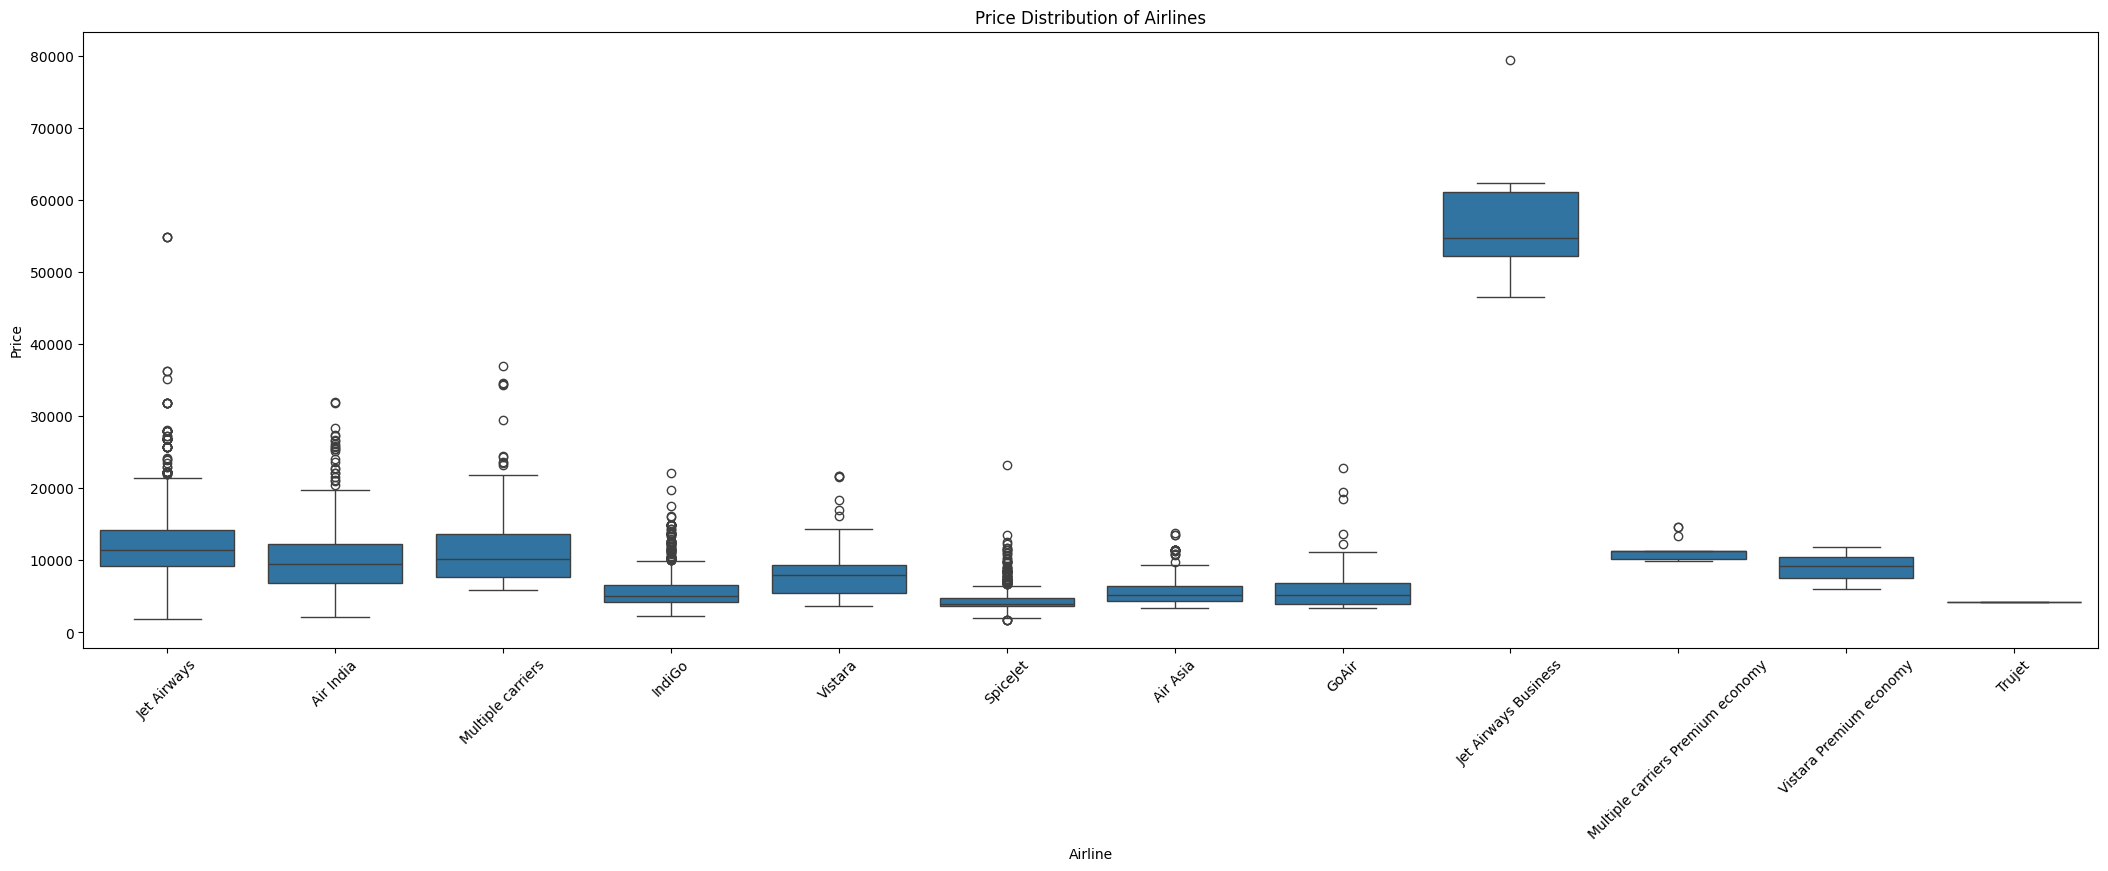

In [28]:
df_line_price = df_fly.groupby(['Airline'])['Price'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(26, 8))
sns.boxplot(x='Airline', y='Price', data=df_fly, order=df_line_price['Airline'])
plt.xticks(rotation=45)
plt.title('Price Distribution of Airlines')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()


# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

To identify potential outliers in the dataset, you can use a boxplot and look for any data points that fall outside the whiskers of the boxplot. Outliers can significantly impact your analysis by skewing statistical measures such as the mean and standard deviation. 

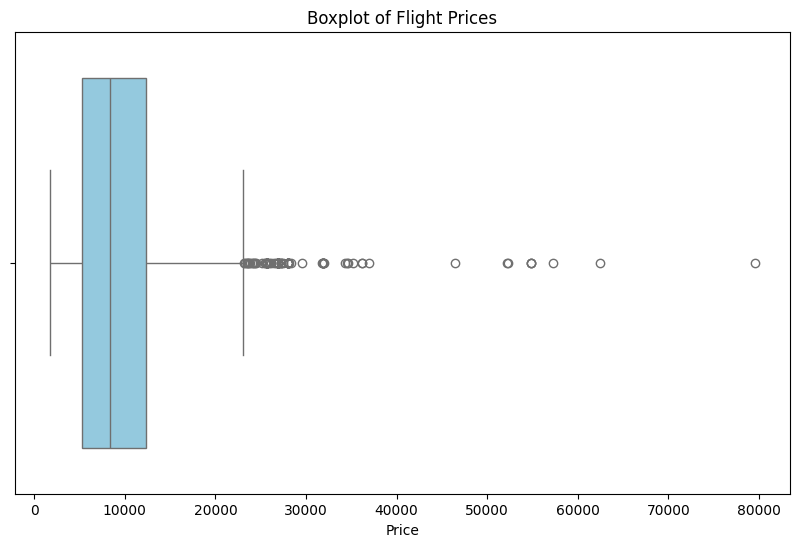

In [30]:
# 1st method
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price', data=df_fly, color='skyblue')
plt.title('Boxplot of Flight Prices')
plt.xlabel('Price')
plt.show()


In [29]:
# 2nd method 

Q1 = df_fly['Price'].quantile(0.25)
Q3 = df_fly['Price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df_fly[(df_fly['Price'] < lower_bound) | (df_fly['Price'] > upper_bound)]

print("Potential outliers:")
print(outliers)


Potential outliers:
                    Airline Date_of_Journey    Source Destination  \
123               Air India       1/03/2019     Delhi      Cochin   
396       Multiple carriers       1/03/2019     Delhi      Cochin   
486             Jet Airways      01/03/2019  Banglore   New Delhi   
510             Jet Airways      01/03/2019  Banglore   New Delhi   
597               Air India       6/03/2019    Mumbai   Hyderabad   
...                     ...             ...       ...         ...   
10353           Jet Airways       6/03/2019    Mumbai   Hyderabad   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   
10383           Jet Airways      01/03/2019  Banglore   New Delhi   
10439           Jet Airways      01/03/2019  Banglore   New Delhi   
10511             Air India      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
123          DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m      1 stop   



Potential outliers are those data points where the price is less than the lower bound or greater than the upper bound calculated using the IQR. These outliers may represent unusually high or low prices that could impact your analysis if not handled appropriately. Depending on the context of your analysis, you may choose to remove or adjust these outliers.

#  Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [89]:
df_fly.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


To identify the peak travel season from the Flight Price dataset, you can analyze several features that may indicate high demand or increased flight prices during certain times of the year.

1. **Date/Time Features**: Analyze flight prices over time, including month, season, day of the week, and time of day.
2. **Holiday/Event Data**: Check if there are any holidays or major events during specific time periods that could affect travel demand and flight prices.
3. **Historical Data**: Look at historical flight price trends to identify patterns or recurring peak seasons.

In current dataset i use Date_of_journey to identify peak travel season

ways to present my findings to your boss:

1. **Visualizations**: Use visualizations such as line plots or bar charts to show how flight prices vary over time, highlighting any spikes or patterns that indicate peak travel seasons.
2. **Summary Statistics**: Provide summary statistics such as average prices or price ranges during different time periods to quantify the impact of peak travel seasons.
3. **Comparison**: Compare flight prices during different months, seasons, or specific time periods to identify the peak season with the highest prices or demand.
4. **Insights**: Provide insights into the factors driving peak travel seasons, such as holidays, events, or seasonal trends in travel demand.


#  Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

To analyze trends in flight prices using the Flight Price dataset, you can focus on several key features that may influence pricing dynamics:

1. **Time-based Features**: Analyze flight prices over time, including day of the week, month, season, and year. This can help identify seasonal trends, such as peak travel seasons or off-peak periods.
2. **Flight Route**: Examine how prices vary across different flight routes. Certain routes may have higher demand or operating costs, leading to differences in pricing trends.
3. **Airline**: Compare prices across different airlines to identify pricing strategies and competitiveness in the market.
4. **Class of Service**: Investigate price trends for different classes of service (e.g., economy, business, first class) to understand pricing dynamics based on service level.
5. **Advance Booking**: Analyze how prices vary based on the advance booking window, such as prices for last-minute bookings versus bookings made well in advance.

To present your findings to your team, you can use a variety of visualizations to effectively communicate the trends in flight prices :

1. **Line Plot**: Use a line plot to show how flight prices vary over time, with separate lines representing different airlines or flight routes.
2. **Bar Chart**: Create a bar chart to compare average flight prices across different months or seasons, highlighting any seasonal trends.
3. **Boxplot**: Use a boxplot to visualize the distribution of flight prices for different classes of service, providing insights into pricing variations.
4. **Scatter Plot**: Use a scatter plot to examine the relationship between advance booking time and flight prices, identifying any patterns or trends.
5. **Heatmap**: Create a heatmap to visualize average flight prices across different routes and months, highlighting routes with higher or lower prices.


#  Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

As a data scientist working for an airline company, analyzing the Flight Price dataset to identify factors that affect flight prices is crucial for understanding pricing dynamics and making informed decisions. Here's how you can approach this analysis:

### Features to Analyze:
1. **Time-based Features**: Analyze flight prices over time, including day of the week, month, season, and year, to identify seasonal trends and demand fluctuations.
2. **Airline and Class of Service**: Compare prices across different airlines and classes of service (economy, business, first class) to understand pricing strategies and customer segmentation.
3. **Advance Booking**: Analyze how prices vary based on the advance booking window, considering factors such as demand forecasting, yield management, and pricing optimization.
4. **Flight Duration**: Examine the impact of flight duration on prices, considering factors such as fuel costs, aircraft type, and customer preferences.
5. **Holiday and Events**: Identify how prices fluctuate during holidays and major events, considering factors such as demand surges, peak travel seasons, and pricing strategies.
6. **Competitor Pricing**: Analyze competitor pricing data to understand market dynamics and competitive positioning.
7. **Promotions and Discounts**: Investigate the impact of promotions, discounts, and loyalty programs on flight prices and customer behavior.

### Presentation of Findings to Management Team:
1. **Summary**: Provide a concise overview of the analysis objectives, methodology, and key findings.
2. **Visualizations**: Use visualizations such as line plots, bar charts, boxplots, and heatmaps to illustrate trends and relationships between flight prices and various factors.
3. **Key Insights**: Summarize the key insights derived from the analysis, highlighting significant factors that affect flight prices and their impact on business performance.
4. **Implications and Next Steps**: Discuss the implications of the findings for business strategy and operations, outlining potential next steps for further analysis or implementation.

# Google Playstore:

# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [199]:
df_play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [124]:
df_play.shape

(10841, 13)

rows = 10841

columns = 13

# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [125]:
df_play['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [126]:
df_play['Category'] = df_play['Category'].astype(str)

# Drop rows where any cell in the 'Category' column contains '1.9'
df_filtered = df_play[~df_play['Category'].str.contains('1.9')]

df_filtered['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

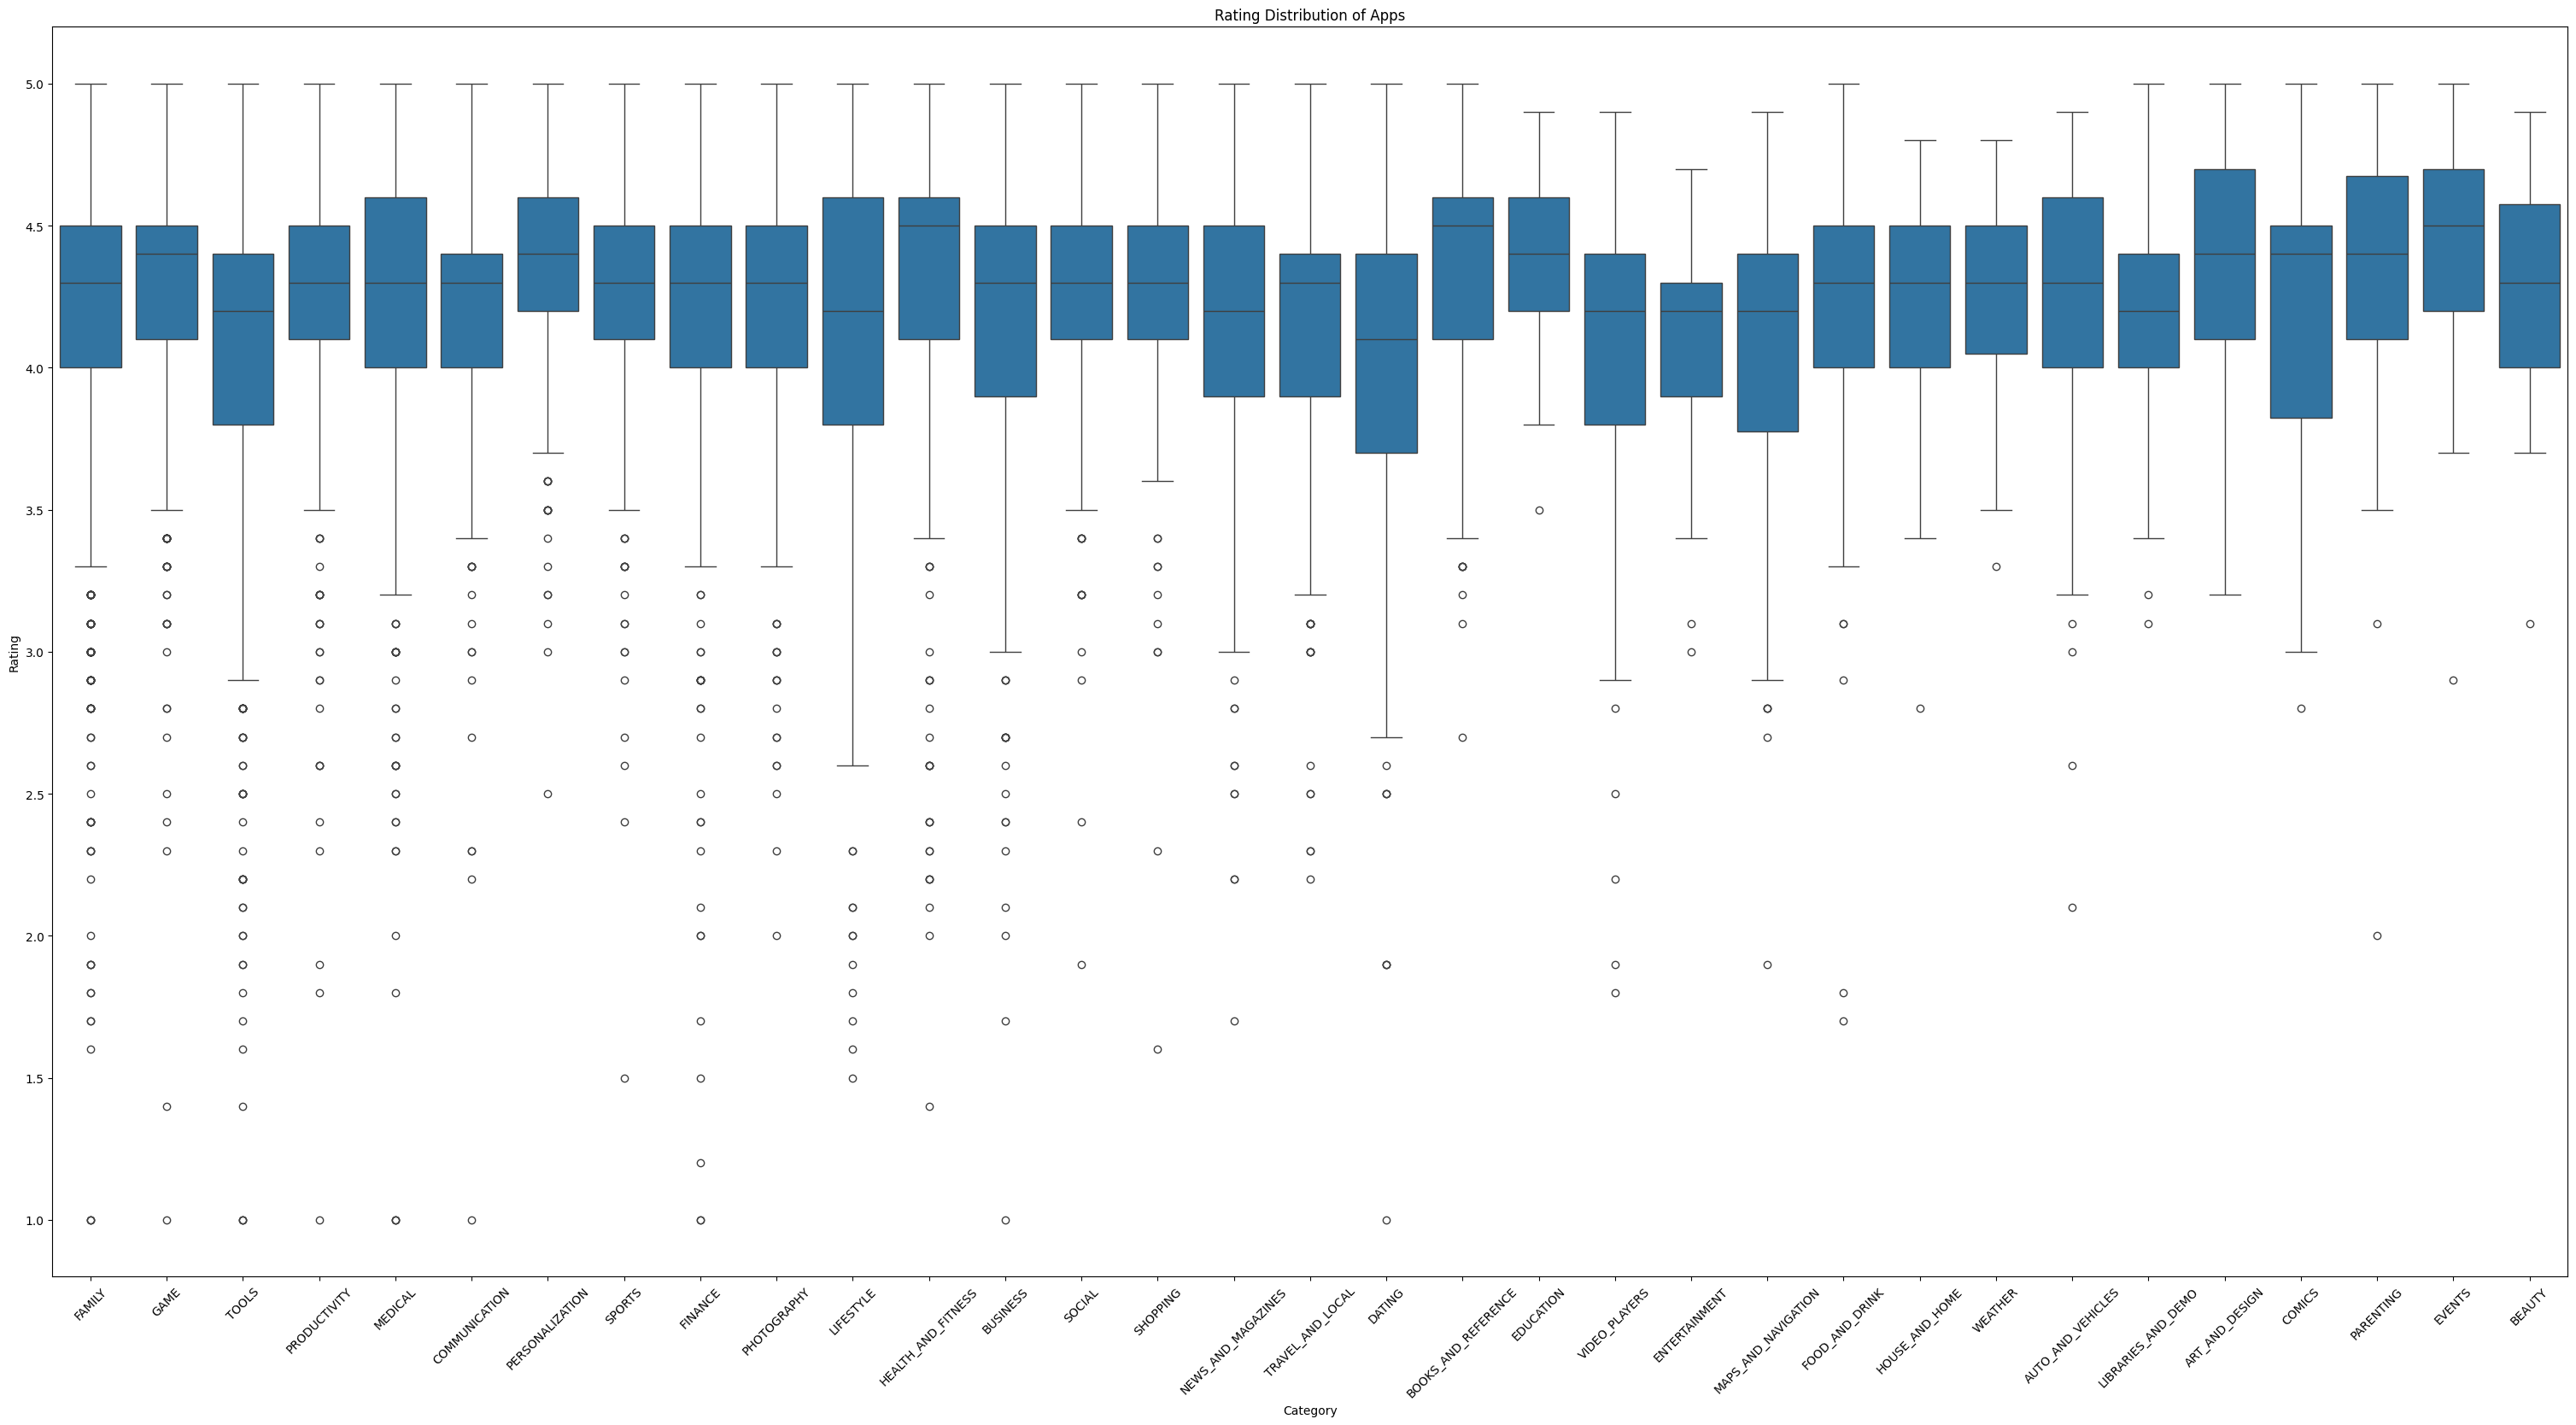

In [127]:
df_rat_play = df_filtered.groupby(['Category'])['Rating'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(38, 19))
sns.boxplot(x='Category', y='Rating', data=df_filtered, order=df_rat_play['Category'])
plt.xticks(rotation=45)
plt.title('Rating Distribution of Apps')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()


# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [128]:
df_play.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [129]:
missing_values = df_play.isnull().sum()

total_missing = missing_values.sum()
print("Total number of missing values:", total_missing)


Total number of missing values: 1487


Based on the result :

1. **Rating**: 1474 missing values
2. **Type**: 1 missing value
3. **Content Rating**: 1 missing value
4. **Current Ver**: 8 missing values
5. **Android Ver**: 3 missing values

These missing values may impact :

- **Rating**: Missing values in the 'Rating' column may affect your analysis if you're examining user ratings or sentiment analysis. It's important to consider how these missing values could skew your analysis of app ratings and user feedback.
  
- **Type** and **Content Rating**: These missing values may impact your analysis if you're examining the distribution of app types (free vs. paid) or content ratings (e.g., everyone, teen, mature). Consider how these missing values could affect your understanding of app demographics and user preferences.
  
- **Current Ver** and **Android Ver**: Missing values in these columns may impact your analysis if you're examining app versions or compatibility with different Android versions. It's essential to address these missing values to ensure accurate analysis of app updates and compatibility trends.

#  Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [130]:
df_play['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [131]:
df_copy = df_play.copy()

chars_to_remove=['+',',','.']
for item in chars_to_remove:
    df_copy['Size']=df_copy['Size'].str.replace(item,'')

df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)
df_copy['Size']=df_copy['Size']/1000

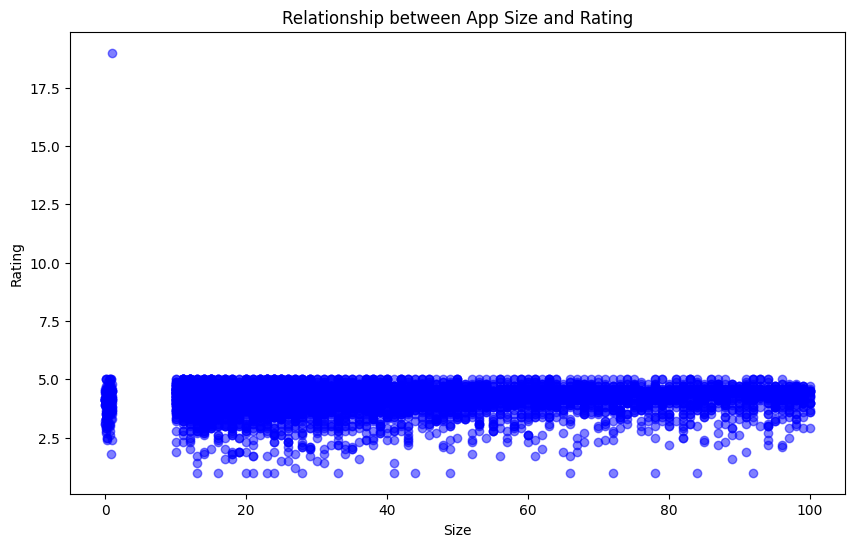

In [132]:
plt.figure(figsize=(10, 6))
plt.scatter(df_copy['Size'], df_copy['Rating'], alpha=0.5, color='blue')


plt.title('Relationship between App Size and Rating')
plt.xlabel('Size')
plt.ylabel('Rating')


plt.show()


## Observations
there are no relation ship between rating and size, since large size apps have rating of 5 as well as have smaller apps also have higher rating. but large apps tend to have more rating then 2.5 in genral but small apps have lower rating then 2.5 rating

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [133]:
df_play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [173]:
df_play['Type'].value_counts()

Type
Free    10039
Paid      800
nan         1
0           1
Name: count, dtype: int64

In [138]:
df_play['Type'] = df_play['Type'].astype(str)

df_filtered1 = df_play[~df_play['Type'].str.contains('nan')]
df_filtered1['Type']=df_filtered1['Type'].str.replace('0','Free')


In [139]:
df_filtered1['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [142]:
df_filtered1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [165]:
chars_to_remove=['+',',','$']
for item in chars_to_remove:
        df_filtered1['Price']=df_filtered1['Price'].str.replace(item,'')

df_filtered1 = df_filtered1[~df_filtered1['Price'].str.contains('Everyone')]
df_filtered1['Price']=df_filtered1['Price'].astype(float) 

In [166]:
df_filtered1['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

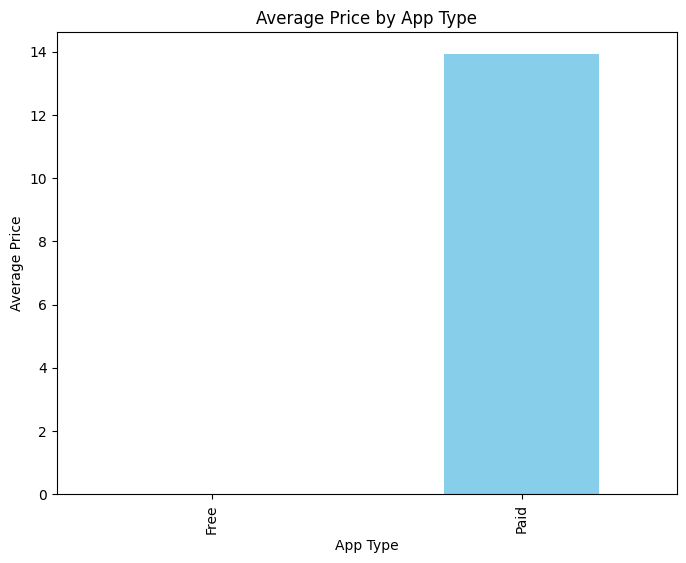

In [174]:
average_prices = df_filtered1.groupby('Type')['Price'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
average_prices.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Average Price by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')

# Show the plot
plt.show()


# Observations

- All free apps are available for installation at no cost, as expected.
- Paid apps require payment for installation, with avarage prics approximately $14.00.
- There is a significantly higher number of free apps compared to paid apps, indicating a greater availability of free apps in the dataset.

# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

<Axes: ylabel='count'>

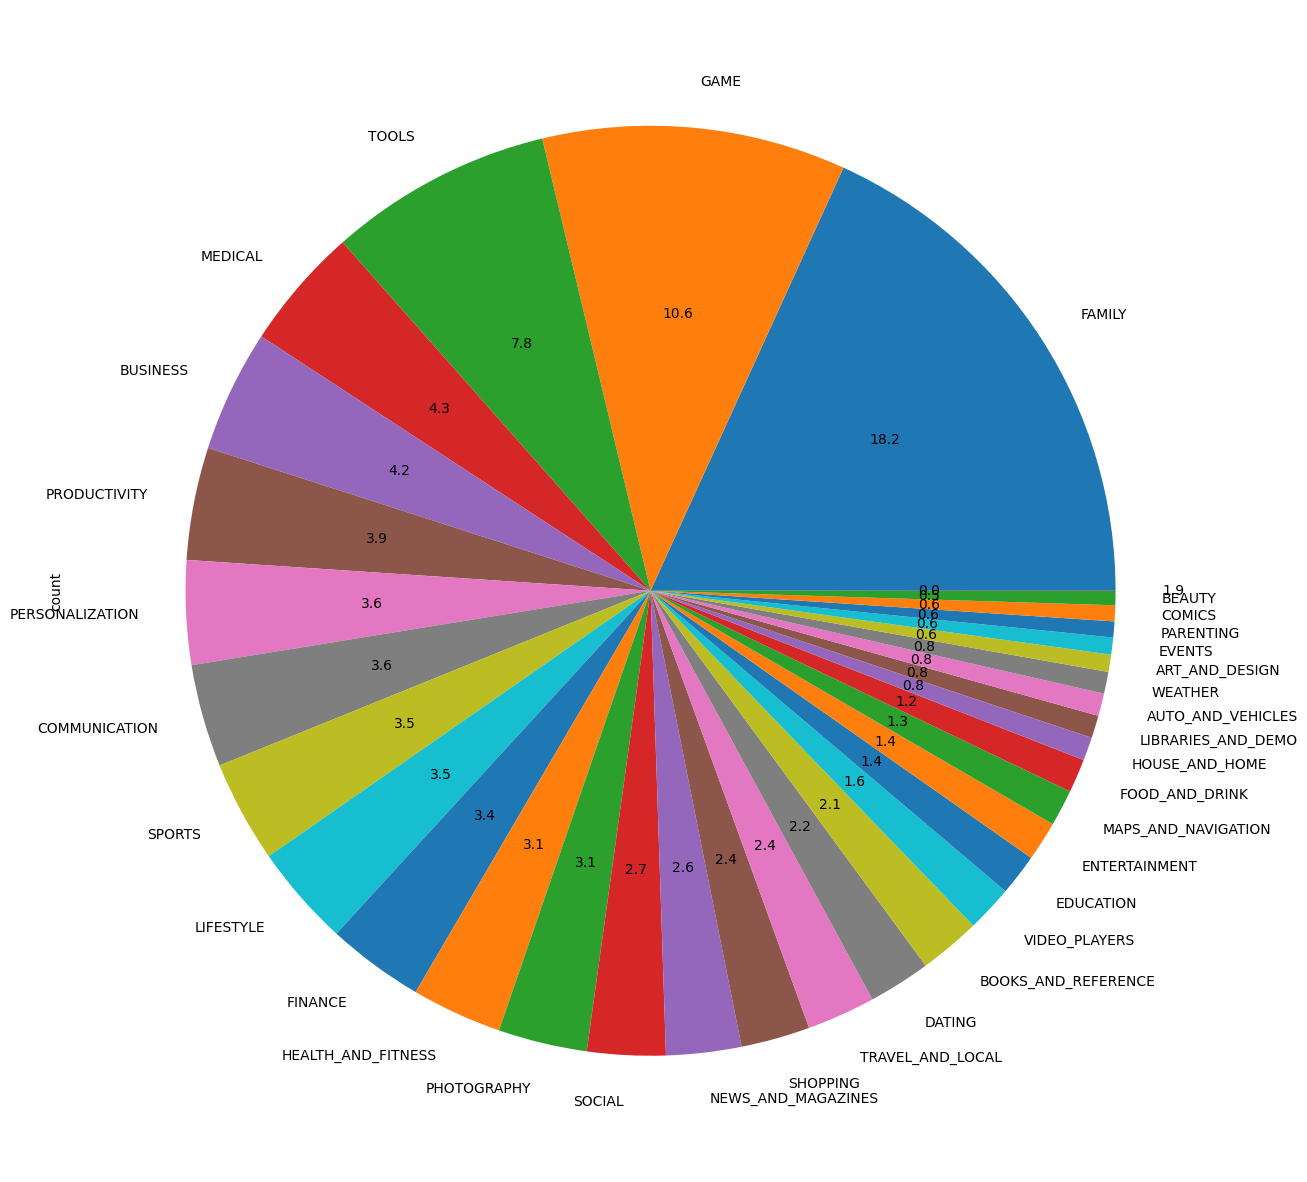

In [197]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')

In [195]:
## Top 10 App Categories
category = pd.DataFrame(df_copy['Category'].value_counts()) 
category.rename(columns = {'Category':'Count'},inplace=True)
category['']

In [198]:
category.head(10)

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

1. **Data Preparation**:
   - Load the Google Play Store dataset into a DataFrame.
   - Ensure the dataset is clean and formatted properly for analysis.

2. **Exploratory Data Analysis (EDA)**:
   - Explore the dataset to understand its structure and contents.
   - Identify the available features (columns) that provide information about app categories, installs, ratings, etc.

3. **Analysis of App Categories**:
   - Analyze the distribution of app categories in the dataset to identify the most common categories.
   - Calculate summary statistics for each app category, such as average number of installs, average rating, etc.

4. **Identifying Popular Categories**:
   - Determine the popularity of app categories based on metrics such as total number of installs, average rating, or a combination of both.
   - Rank the app categories based on their popularity.

5. **Visualizations and Insights**:
   - Create visualizations (e.g., bar charts, pie charts) to illustrate the distribution and popularity of app categories.
   - Provide insights into the most popular app categories and their characteristics (e.g., average rating, number of installs).

6. **Recommendations**:
   - Based on the analysis, make recommendations to the company regarding the most popular app categories that are likely to be successful for launching a new app.
   - Consider factors such as competition within categories, market trends, and potential audience preferences.

Features to Analyze:
- **Category**: Analyze the distribution of app categories and their popularity.
- **Installs**: Evaluate the number of installs for apps in each category to determine popularity.
- **Rating**: Examine the average rating of apps in each category to assess user satisfaction.
- **Reviews**: Consider the number of reviews as an indicator of user engagement.
- **Size**: Analyze the size of apps in each category to understand user preferences.
- **Price**: Evaluate the pricing strategy of apps in each category and its impact on popularity.
- **Content Rating**: Consider the target audience of apps in each category.

# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

### Features to Analyze:
1. **Number of Apps**: Analyze the total number of apps published by each developer to identify prolific developers.
2. **Installs**: Evaluate the total number of installs for apps published by each developer to gauge popularity and success.
3. **Ratings**: Examine the average ratings of apps published by each developer to assess user satisfaction and quality.
4. **Reviews**: Evaluate the total number of reviews for apps published by each developer to gauge user engagement and feedback.
5. **App Size**: Analyze the average size of apps published by each developer to understand development trends and preferences.
6. **Price**: Evaluate the pricing strategy of apps published by each developer to assess monetization strategies and success.
7. **Last Updated**: Analyze the frequency of app updates by each developer to assess their commitment to app maintenance and improvement.

### Data Visualizations:
1. **Bar Charts**: Create bar charts to visualize the total number of apps published by each developer and the total number of installs for their apps.
2. **Boxplots**: Use boxplots to compare the average ratings and app sizes across different developers.
3. **Scatter Plots**: Generate scatter plots to visualize the relationship between the number of reviews and the number of installs for apps published by each developer.
4. **Heatmaps**: Create heatmaps to visualize the distribution of app updates over time for each developer.
5. **Pie Charts**: Use pie charts to illustrate the distribution of app categories among the apps published by each developer.

### Recommendations:
- Based on the analysis, recommend the top developers based on various metrics such as the total number of installs, average ratings, and user engagement.
- Provide insights into successful developer strategies and characteristics, such as frequent app updates, high-quality apps, and effective monetization strategies.
- Recommend collaboration opportunities or partnerships with top developers to leverage their expertise and success in app development.
- Provide suggestions for improvement or areas of focus for developers looking to enhance their success and performance in the Google Play Store.

#  Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

### Features to Analyze:
1. **Installs**: Analyze the trend in app installs over time to identify periods of high demand.
2. **Rating**: Examine how app ratings vary over time to understand user satisfaction trends.
3. **Reviews**: Evaluate the trend in the number of reviews over time to gauge user engagement.
4. **Last Updated**: Analyze the distribution of app updates over time to understand the frequency of app updates.
5. **Day, Month, Year**: Explore the distribution of app launches over days, months, and years to identify seasonal trends and patterns.

### Data Visualizations:
1. **Time Series Plots**: Use line plots to visualize trends in installs, ratings, and reviews over time. This can help identify peak periods of activity.
2. **Bar Charts**: Create bar charts to illustrate the distribution of app launches by day of the week, month, and year. This can reveal patterns in app launches.
3. **Boxplots**: Use boxplots to compare app ratings and number of reviews across different months or years. This can help identify seasonal trends in user engagement.
4. **Heatmaps**: Generate heatmaps to visualize the distribution of app launches by day of the week and hour of the day. This can highlight the most and least active times for app launches.
5. **Histograms**: Create histograms to visualize the distribution of app updates over time. This can provide insights into the frequency of app updates.

### Recommendations:
- Based on the analysis, recommend specific time periods (e.g., months, days of the week, hours) that have shown high levels of user activity and engagement for app launches.
- Consider seasonal trends and patterns identified in the data to optimize the timing of the app launch.
- Provide insights into user behavior and preferences based on trends in installs, ratings, and reviews over time.
- Recommend strategies for app updates and maintenance based on the frequency of app updates observed in the data.